In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df['Transmission Type'] = df['Transmission'].apply(lambda x: ''.join(filter(str.isalpha, x)))
df['Number of Gears'] = df['Transmission'].apply(lambda x: ''.join(filter(str.isdigit, x)) if any(char.isdigit() for char in x) else np.nan)

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Number of Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,AS,5
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,M,6
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,AV,7
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,AS,6
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,AS,6


In [4]:
df[df.select_dtypes(include='object').columns].nunique()

Make                   42
Model                2053
Vehicle Class          16
Transmission           27
Fuel Type               5
Transmission Type       5
Number of Gears         7
dtype: int64

In [5]:
df.drop(['Model', 'Transmission'], axis=1, inplace=True)
df.head()

,Make,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Number of Gears
0,ACURA,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196,AS,5
1,ACURA,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221,M,6
2,ACURA,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136,AV,7
3,ACURA,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255,AS,6
4,ACURA,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244,AS,6


In [6]:
df.rename(columns={'Make' : 'Vehicle Brand'}, inplace=True)
df.head()

,Vehicle Brand,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Number of Gears
0,ACURA,COMPACT,2.0,4,Z,9.9,6.7,8.5,33,196,AS,5
1,ACURA,COMPACT,2.4,4,Z,11.2,7.7,9.6,29,221,M,6
2,ACURA,COMPACT,1.5,4,Z,6.0,5.8,5.9,48,136,AV,7
3,ACURA,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,25,255,AS,6
4,ACURA,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,27,244,AS,6


In [7]:
df.dtypes

Vehicle Brand                        object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
Transmission Type                    object
Number of Gears                      object
dtype: object

In [8]:
df.isnull().sum()

Vehicle Brand                         0
Vehicle Class                         0
Engine Size(L)                        0
Cylinders                             0
Fuel Type                             0
Fuel Consumption City (L/100 km)      0
Fuel Consumption Hwy (L/100 km)       0
Fuel Consumption Comb (L/100 km)      0
Fuel Consumption Comb (mpg)           0
CO2 Emissions(g/km)                   0
Transmission Type                     0
Number of Gears                     295
dtype: int64

In [9]:
mode_value = df['Number of Gears'].mode()[0]
df.fillna({'Number of Gears' : mode_value}, inplace=True)

In [10]:
df.isnull().sum()

Vehicle Brand                       0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
Transmission Type                   0
Number of Gears                     0
dtype: int64

In [11]:
df.shape

(7385, 12)

In [12]:
df.duplicated().sum()

2173

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(5212, 12)

In [15]:
df['Number of Gears'] = df['Number of Gears'].astype('int64')
df['Fuel Consumption Comb (mpg)'] = df['Fuel Consumption Comb (mpg)'].astype('float64')
df['CO2 Emissions(g/km)'] = df['CO2 Emissions(g/km)'].astype('float64')

In [16]:
df.dtypes

Vehicle Brand                        object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
Transmission Type                    object
Number of Gears                       int64
dtype: object

In [17]:
numerical_columns = df.select_dtypes(include='number').columns

n_cols = 4
n_rows = 2

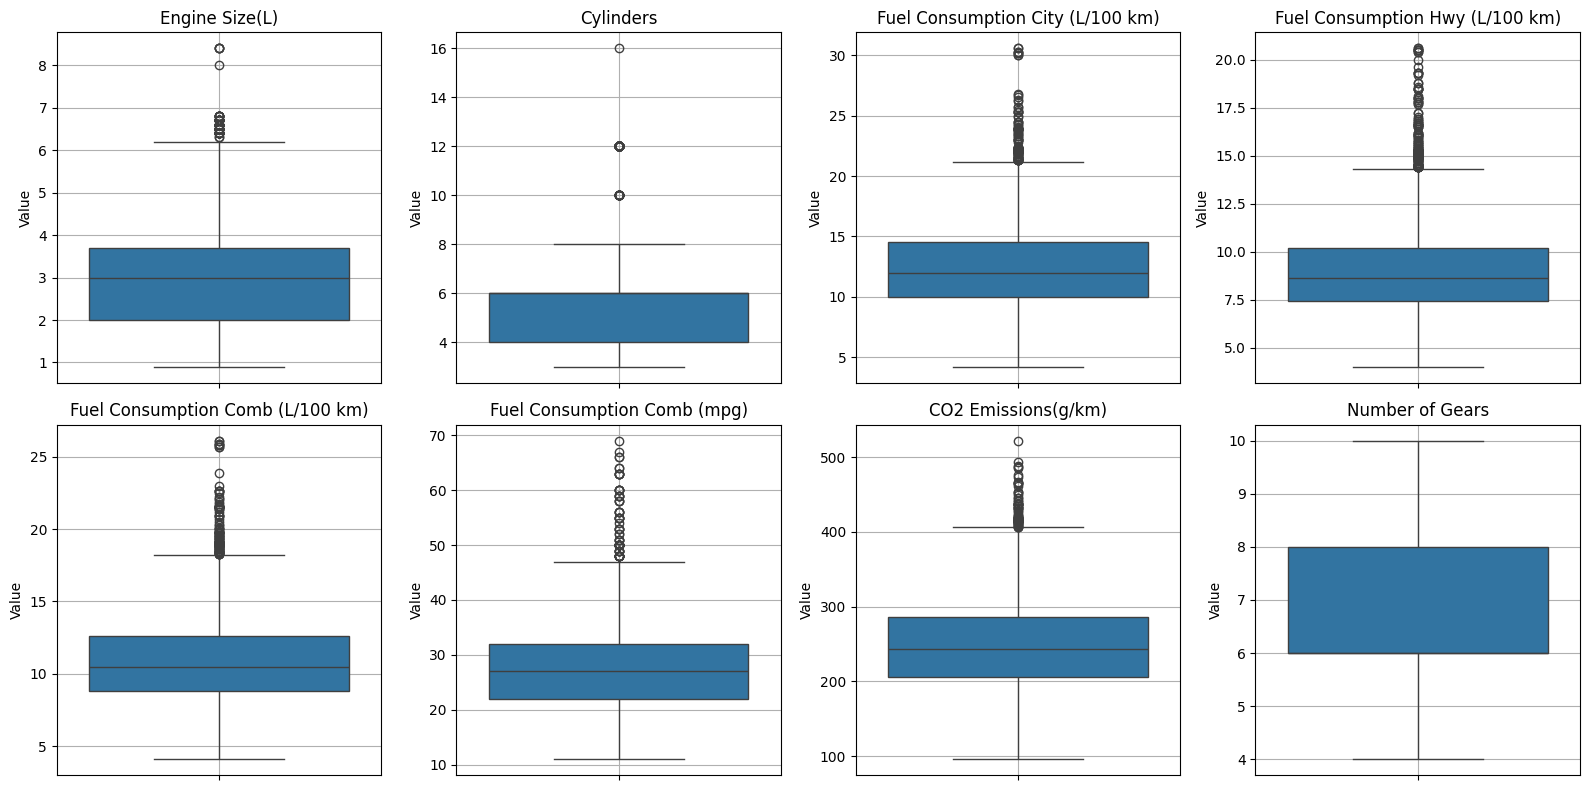

In [18]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df[column], ax=axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('Value')
    axes[index].grid(True)
    
plt.tight_layout()
plt.show()

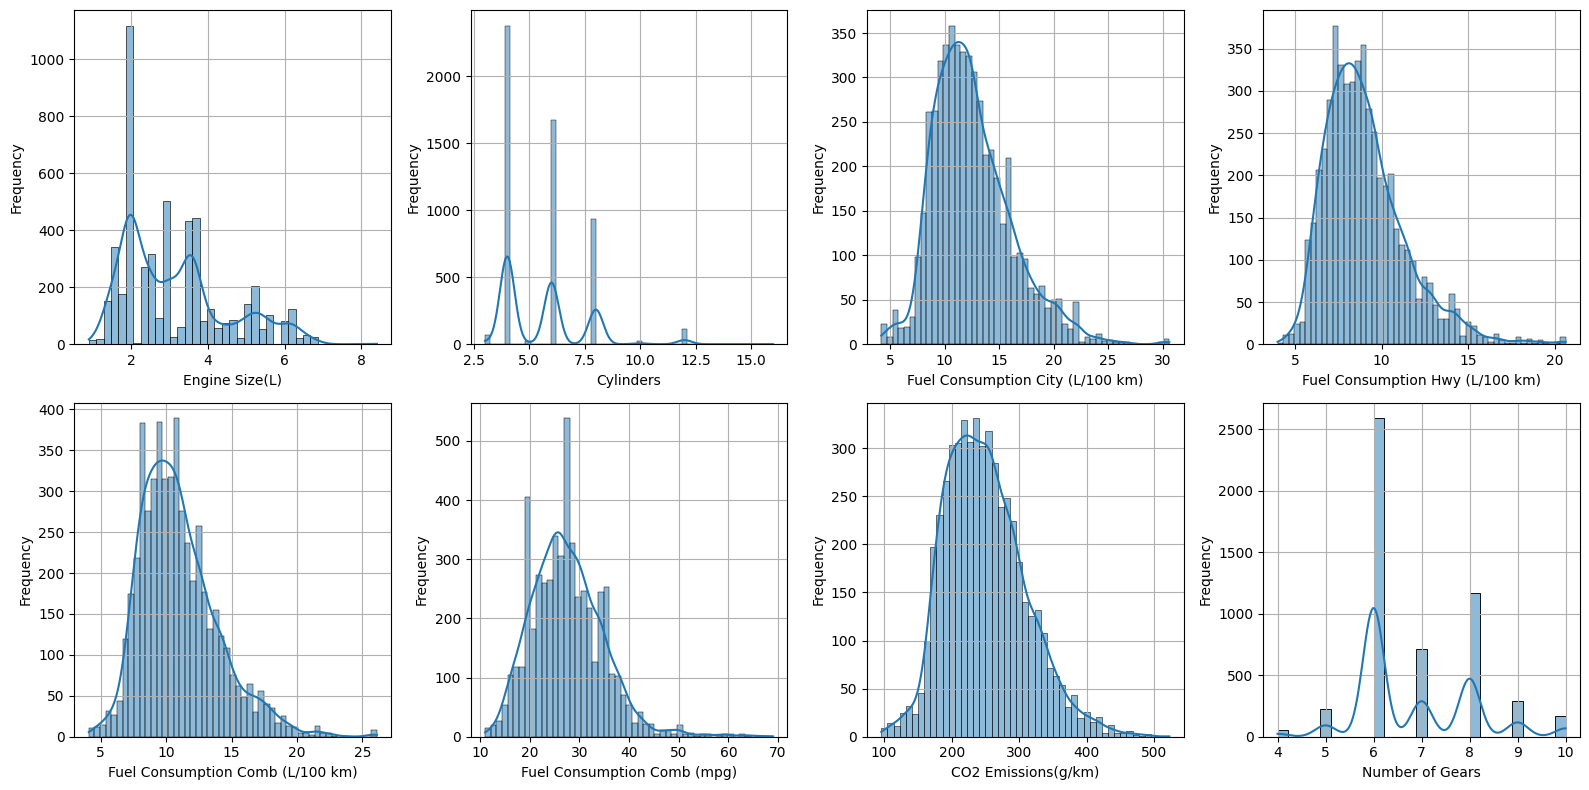

In [19]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()

for index, column in enumerate(numerical_columns):
    sns.histplot(data=df[column], ax=axes[index], kde=True)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)
    
plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Vehicle Brand,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Transmission Type,Number of Gears
0,0,0,2.0,4,4,9.9,6.7,8.5,33.0,196.0,2,5
1,0,0,2.4,4,4,11.2,7.7,9.6,29.0,221.0,4,6
2,0,0,1.5,4,4,6.0,5.8,5.9,48.0,136.0,3,7
3,0,11,3.5,6,4,12.7,9.1,11.1,25.0,255.0,2,6
4,0,11,3.5,6,4,12.1,8.7,10.6,27.0,244.0,2,6


In [21]:
df['CO2 Emissions(g/km)'] = df.pop('CO2 Emissions(g/km)')
df.head()

,Vehicle Brand,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Transmission Type,Number of Gears,CO2 Emissions(g/km)
0,0,0,2.0,4,4,9.9,6.7,8.5,33.0,2,5,196.0
1,0,0,2.4,4,4,11.2,7.7,9.6,29.0,4,6,221.0
2,0,0,1.5,4,4,6.0,5.8,5.9,48.0,3,7,136.0
3,0,11,3.5,6,4,12.7,9.1,11.1,25.0,2,6,255.0
4,0,11,3.5,6,4,12.1,8.7,10.6,27.0,2,6,244.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df.iloc[:, :11]
Y = df.iloc[:, 11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [23]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(random_state=101)
xgbr.fit(X_train, Y_train)

Y_pred_train = xgbr.predict(X_train)
Y_pred_test = xgbr.predict(X_test)

print('Train Accuracy :', r2_score(Y_train, Y_pred_train))
print('Test Accuracy :', r2_score(Y_test, Y_pred_test))

Train Accuracy : 0.9992617197587573
Test Accuracy : 0.9927449079965722


In [24]:
from xgboost import XGBRFRegressor

xgbrfr = XGBRFRegressor(random_state=101)
xgbrfr.fit(X_train, Y_train)

Y_pred_train = xgbrfr.predict(X_train)
Y_pred_test = xgbrfr.predict(X_test)

print('Train Accuracy :', r2_score(Y_train, Y_pred_train))
print('Test Accuracy :', r2_score(Y_test, Y_pred_test))

Train Accuracy : 0.9963421961216248
Test Accuracy : 0.9928550362926635


In [25]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=101)
rfr.fit(X_train, Y_train)

Y_pred_train = rfr.predict(X_train)
Y_pred_test = rfr.predict(X_test)

print('Train Accuracy :', r2_score(Y_train, Y_pred_train))
print('Test Accuracy :', r2_score(Y_test, Y_pred_test))

Train Accuracy : 0.9991887485503682
Test Accuracy : 0.9955002908286574


In [26]:
from lightgbm import LGBMRegressor

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "6"

lgbmc = LGBMRegressor(random_state=101, verbose=-1, force_row_wise=True)
lgbmc.fit(X_train, Y_train)

Y_pred_train = lgbmc.predict(X_train)
Y_pred_test = lgbmc.predict(X_test)

print('Train Accuracy :', r2_score(Y_train, Y_pred_train))
print('Test Accuracy :', r2_score(Y_test, Y_pred_test))

Train Accuracy : 0.9978109579538295
Test Accuracy : 0.9954142128821749


In [27]:
import pickle

with open('Vehicle_CO2_Emission_Predictor.pkl', 'wb') as file:
    pickle.dump(rfr, file)
    
with open('Vehicle_CO2_Emission_Predictor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
print('Accuracy of the loaded model :', loaded_model.score(X_test, Y_test))

Accuracy of the loaded model : 0.9955002908286574
